In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt

In [19]:
cat_path  = "cat.csv"
data_path = "data.csv"

all_cat = open(cat_path, 'r').read().split(",")
all_cat.sort()

df      = pd.read_csv(data_path)
df.dropna(inplace = True)

In [20]:
df.shape

(2687, 2)

In [21]:
# Initialize graph
G = nx.Graph()
# Adding the node to graph
G.add_nodes_from(all_cat)

In [22]:
# df["Fields"] = df["Fields"].apply(lambda x: x.replace("alg-geom", "math")) # Algebraic Geometry (math.AG) 
# df["Fields"] = df["Fields"].apply(lambda x: x.replace("dg-ga", "math")) # Differential Geometry (math.DG)
# df["Fields"] = df["Fields"].apply(lambda x: x.replace("q-alg", "math")) # Quantum Algebra (math.QA)

# df["Fields"] = df["Fields"].apply(lambda x: x.replace("patt-sol", "nlin")) # Pattern Formation and Solitons (nlin.PS); 
# df["Fields"] = df["Fields"].apply(lambda x: x.replace("adap-org", "nlin")) # Adaptation and Self-Organizing Systems (nlin.AO)
# df["Fields"] = df["Fields"].apply(lambda x: x.replace("solv-int", "nlin")) # Exactly Solvable and Integrable Systems (nlin.SI) 
# df["Fields"] = df["Fields"].apply(lambda x: x.replace("chao-dyn", "nlin")) # Chaotic Dynamics (nlin.CD) 
# df["Fields"] = df["Fields"].apply(lambda x: x.replace("comp-gas", "nlin")) # Cellular Automata and Lattice Gases (nlin.CG) 


# df["Fields"] = df["Fields"].apply(lambda x: x.replace("chem-ph", "physics")) # Chemical Physics (physics.chem-ph) 

# df["Fields"] = df["Fields"].apply(lambda x: x.replace("mtrl-th", "cond-mat")) # Materials Science (cond-mat.mtrl-sci)

# df["Fields"] = df["Fields"].apply(lambda x: x.replace("cmp-lg", "cs")) # Computation and Language (cs.CL)


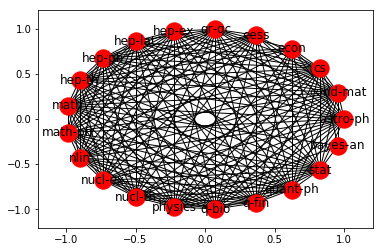

In [23]:
for field in  df["Fields"].values:
    try:
        field_list = field.split(";")
        field_pair = itertools.combinations(field_list, 2)
        G.add_edges_from(field_pair)
    except AttributeError as e:
        print(e)
        print(field)
nx.draw_networkx(G,pos = nx.circular_layout(G),with_labels=True)
plt.show()
# G.edges
# test = df["Fields"].values[1].split(";")
# test2 = list(itertools.combinations(test,2))

In [44]:
np.mean([i[1] for i in G.degree])

19.80952380952381

In [24]:
# making dictionary mapping a cat to a number
cat_dict = {}
for (i, v) in enumerate(all_cat):
    cat_dict.update({v:i})

In [25]:
cat_dict

{'astro-ph': 0,
 'cond-mat': 1,
 'cs': 2,
 'econ': 3,
 'eess': 4,
 'gr-qc': 5,
 'hep-ex': 6,
 'hep-lat': 7,
 'hep-ph': 8,
 'hep-th': 9,
 'math': 10,
 'math-ph': 11,
 'nlin': 12,
 'nucl-ex': 13,
 'nucl-th': 14,
 'physics': 15,
 'q-bio': 16,
 'q-fin': 17,
 'quant-ph': 18,
 'stat': 19}

In [26]:
df["Fields"].values[1]

'math;hep-ph;math;math;cs;math;math;math;eess;stat'

In [27]:
# Initialize adjacency matrix
n   = len(cat_dict)
mat = np.zeros((n, n))

for (i, fields) in enumerate(df["Fields"].values):
    try:
        field_list       = fields.split(";")
        field_list_index = list(map(lambda x: cat_dict[x], field_list))
        for pair in itertools.combinations(field_list_index, 2):
            i, j = pair
#             print(pair)
            mat[i, j] +=1
            mat[j, i] +=1
    except KeyError as e:
        print(i, "---", e)
#         print(fields, "---", e)
#         pass
        

780 --- 'bayes-an'
1473 --- 'bayes-an'


In [30]:
df.iloc[780]

Author                                   Darren J Wilkinson
Fields    bayes-an;physics;bayes-an;math;bayes-an;stat;s...
Name: 780, dtype: object

In [31]:
pd.DataFrame(mat, columns=cat_dict.keys(), index = cat_dict.keys())

,astro-ph,cond-mat,cs,econ,eess,gr-qc,hep-ex,hep-lat,hep-ph,hep-th,math,math-ph,nlin,nucl-ex,nucl-th,physics,q-bio,q-fin,quant-ph,stat
astro-ph,8894.0,2341.0,1818.0,28.0,66.0,564.0,275.0,84.0,762.0,390.0,2890.0,140.0,242.0,461.0,191.0,1702.0,362.0,198.0,372.0,213.0
cond-mat,2341.0,17450.0,1946.0,11.0,62.0,513.0,234.0,237.0,772.0,593.0,3494.0,298.0,874.0,291.0,290.0,3163.0,931.0,264.0,967.0,169.0
cs,1818.0,1946.0,14786.0,43.0,173.0,465.0,141.0,121.0,555.0,521.0,4420.0,194.0,325.0,94.0,132.0,1164.0,275.0,178.0,722.0,463.0
econ,28.0,11.0,43.0,18.0,0.0,4.0,0.0,0.0,5.0,11.0,58.0,0.0,3.0,0.0,0.0,10.0,6.0,1.0,5.0,22.0
eess,66.0,62.0,173.0,0.0,20.0,16.0,0.0,0.0,25.0,28.0,157.0,6.0,4.0,1.0,9.0,45.0,2.0,2.0,20.0,6.0
gr-qc,564.0,513.0,465.0,4.0,16.0,2254.0,59.0,35.0,210.0,413.0,830.0,105.0,101.0,50.0,29.0,466.0,64.0,49.0,251.0,38.0
hep-ex,275.0,234.0,141.0,0.0,0.0,59.0,678.0,18.0,217.0,50.0,386.0,13.0,13.0,311.0,35.0,345.0,45.0,19.0,26.0,27.0
hep-lat,84.0,237.0,121.0,0.0,0.0,35.0,18.0,1658.0,182.0,186.0,222.0,23.0,34.0,41.0,2.0,65.0,27.0,17.0,28.0,8.0
hep-ph,762.0,772.0,555.0,5.0,25.0,210.0,217.0,182.0,3178.0,730.0,1041.0,71.0,93.0,196.0,184.0,662.0,148.0,75.0,179.0,64.0
hep-th,390.0,593.0,521.0,11.0,28.0,413.0,50.0,186.0,730.0,3112.0,1389.0,210.0,106.0,76.0,81.0,396.0,106.0,80.0,227.0,93.0


In [32]:
mat.sum()/2

118466.0

individual author > 18 dim - > K-means
taxi-cab metrix

clustering on proportion data

number of paper in a field / total number of papers that author has published